# Task 3: Evaluate Techniques for Wifi Locationing 

# 0_PREPROCESSING Test Data


# Import libraries

In [2]:
# basic
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [3]:
path = '/home/ale/Dropbox/UBIQUM/4.DeepAnalytics&Visualization/T4M3.WiFiLocationing/Data/UJIndoorLoc/'
file = 'trainingData.csv'

Train_data = pd.read_csv(path + file)

Train_data.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710


## Training INPUT DATA (get an idea of the possible WAP values)

In [5]:
# Take a random sample of the original dataframe and make a copy
Train_dataPossibleValues = Train_data.sample(frac =1, random_state= 200)   

In [6]:
Train_dataPossibleValues = Train_dataPossibleValues.drop(['LONGITUDE', 'LATITUDE', 'FLOOR', 'BUILDINGID', 'SPACEID',
       'RELATIVEPOSITION', 'USERID', 'PHONEID', 'TIMESTAMP'], axis = 1)

In [7]:
Train_dataPossibleValues = Train_dataPossibleValues.replace([100],np.nan)
Train_dataPossibleValues.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-83.0,-85.0,NaN,NaN,NaN
2671,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


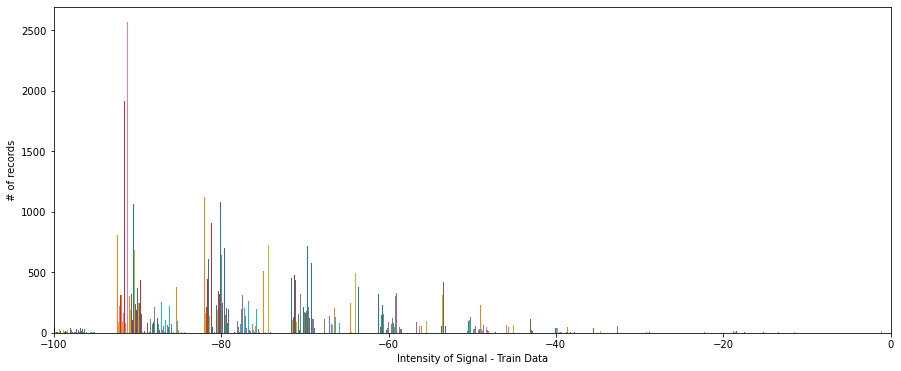

In [17]:
plt.hist(Train_dataPossibleValues, bins = 10)

plt.xlabel('Intensity of Signal - Train Data')
plt.ylabel('# of records')

plt.xlim(-100,0)

plt.savefig("Intensity of Signal - Train Data", format= "png",bbox_inches='tight' )

plt.rcParams['figure.figsize'] = [15, 6]

plt.show();

- there are only a few values with a strong signal. Most of the records fall arround -90 to -70dB. 

## OUTPUT VARIABLES
the main objective of the project is to use signal strenght to guess the location of the cellphones. 

So our outputs are the location variables: 
- **FLOOR, BUILDING, LAT, LONG**. 

### FLOOR

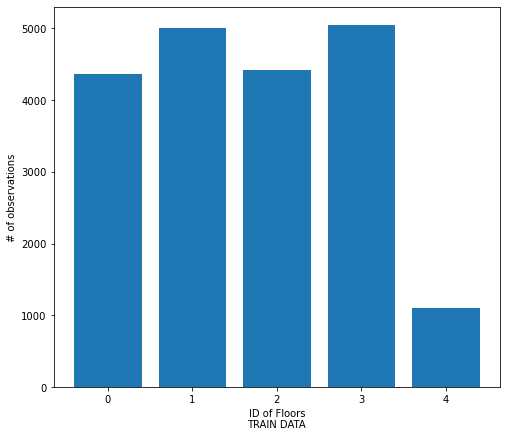

In [20]:
# use plt.bar instead of plt.hist because it can use align='center'. Also removes the float values from the Xaxis
labels, counts = np.unique(Train_data['FLOOR'], return_counts=True)

plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)

plt.xlabel('ID of Floors\nTRAIN DATA')
plt.ylabel('# of observations')

plt.rcParams['figure.figsize'] = [8,7]
#plt.rcParams['figure.figsize'] = [15, 6]

plt.savefig("hist_floor_train", format= "png",bbox_inches='tight' )

plt.show()

- Umbalanced data, there are a lot of datapoints from FLOORS 0 to 3, and only a few of 4. 
- Not all the building have 4 floors. In fact, only BuildingID = 2 has 4 floors. 

### BUILDING ID

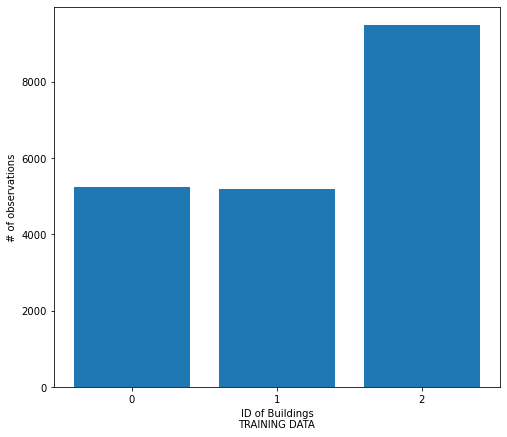

In [21]:
labels, counts = np.unique(Train_data["BUILDINGID"], return_counts=True)

plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)

plt.xlabel('ID of Buildings\nTRAINING DATA')
plt.ylabel('# of observations')

plt.rcParams['figure.figsize'] = [8,7]
#plt.rcParams['figure.figsize'] = [15, 6]

plt.savefig("hist_buildings_trainig", format= "png",bbox_inches='tight' )

plt.show()

- again, quite umbalanced data. Most of data comes from the BuildingID = 2

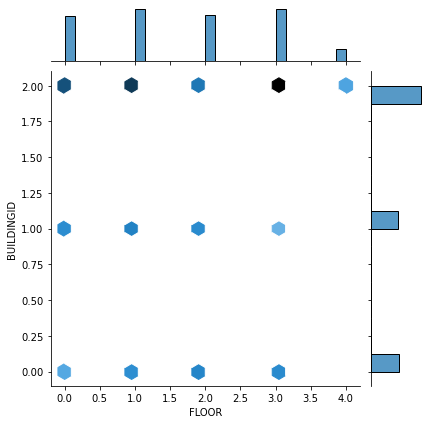

In [31]:
# Custom the inside plot: options are: “scatter” | “reg” | “resid” | “kde” | “hex”
sns.jointplot(x=Tdata['FLOOR'], y=Tdata['BUILDINGID'], kind='hex')

plt.rcParams['figure.figsize'] = [5,5]
#plt.rcParams['figure.figsize'] = [15, 6]

plt.savefig("floor_Builds", format= "png",bbox_inches='tight' )

plt.show()

it's interesting to combine Floor/Building.
- most of data was collected from buildingID=2. and this is the only one with 4 floors. 

### LATITUDE AND LONGITUDE

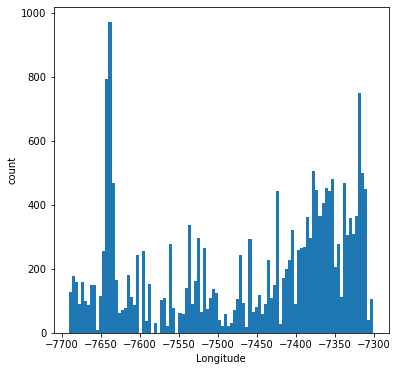

In [38]:
plt.hist(Tdata["LONGITUDE"], bins = 100)

plt.xlabel('Longitude')
plt.ylabel('count')

plt.rcParams['figure.figsize'] = [6,6]
#plt.rcParams['figure.figsize'] = [15, 6]

plt.savefig("LONG_hist", format= "png",bbox_inches='tight' )

plt.show()

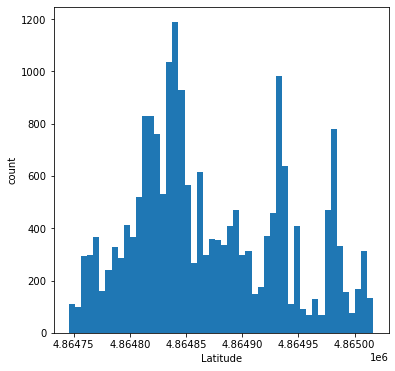

In [39]:
plt.hist(Tdata["LATITUDE"], bins = 50)

plt.xlabel('Latitude')
plt.ylabel('count')

plt.rcParams['figure.figsize'] = [6,6]
#plt.rcParams['figure.figsize'] = [15, 6]

plt.savefig("LAT_hist", format= "png",bbox_inches='tight' )
plt.show()

# Save Data - Unbalanced

In [18]:
path = '/home/ale/Dropbox/UBIQUM/4.DeepAnalytics&Visualization/T4M3.WiFiLocationing/Data/'
file = "0_DataPrepro_Unbalanced.csv"

Tdata.to_csv(path + file, index = False)


Saved_Tdata = pd.read_csv(path + file)

Saved_Tdata.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710
